In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

# 分類数設定

In [3]:
NUM_CLASSES = 7

# 学習データ読み込み

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 7)                 77        
                                                                 
Total params: 1,147
Trainable params: 1,147
Non-trainable params: 0
_________________________________________________________________


In [9]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/25 [>.............................] - ETA: 7s - loss: 1.9200 - accuracy: 0.2109
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
25/25 [==============================] - 1s 8ms/step - loss: 1.8761 - accuracy: 0.2083 - val_loss: 1.7297 - val_accuracy: 0.3147
Epoch 2/1000
 1/25 [>.............................] - ETA: 0s - loss: 1.8108 - accuracy: 0.2500
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
25/25 [==============================] - 0s 3ms/step - loss: 1.7089 - accuracy: 0.3306 - val_loss: 1.5791 - val_accuracy: 0.4076
Epoch 3/1000
 1/25 [>.............................] - ETA: 0s - loss: 1.6142 - accuracy: 0.3984
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
25/25 [==============================] - 0s 3ms/step - loss: 1.5918 - accuracy: 0.3875 - val_loss: 1.4521 - val_accuracy: 0.4322
Epoch 4/1000
 1/25 [>.............................] - ETA: 0s - loss: 1.5134 - accuracy: 0.4531
E

 1/25 [>.............................] - ETA: 0s - loss: 0.7479 - accuracy: 0.7109
Epoch 28: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
25/25 [==============================] - 0s 3ms/step - loss: 0.8016 - accuracy: 0.6836 - val_loss: 0.5322 - val_accuracy: 0.8171
Epoch 29/1000
 1/25 [>.............................] - ETA: 0s - loss: 0.7905 - accuracy: 0.6797
Epoch 29: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
25/25 [==============================] - 0s 3ms/step - loss: 0.8141 - accuracy: 0.6776 - val_loss: 0.5303 - val_accuracy: 0.8142
Epoch 30/1000
 1/25 [>.............................] - ETA: 0s - loss: 0.8972 - accuracy: 0.7031
Epoch 30: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
25/25 [==============================] - 0s 3ms/step - loss: 0.7918 - accuracy: 0.6881 - val_loss: 0.5173 - val_accuracy: 0.8152
Epoch 31/1000
 1/25 [>.............................] - ETA: 0s - loss: 0.8284 - accuracy: 0.6406
Epoch 31

 1/25 [>.............................] - ETA: 0s - loss: 0.6346 - accuracy: 0.7500
Epoch 55: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
25/25 [==============================] - 0s 3ms/step - loss: 0.6752 - accuracy: 0.7317 - val_loss: 0.3929 - val_accuracy: 0.9024
Epoch 56/1000
 1/25 [>.............................] - ETA: 0s - loss: 0.6452 - accuracy: 0.7422
Epoch 56: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
25/25 [==============================] - 0s 3ms/step - loss: 0.7027 - accuracy: 0.7238 - val_loss: 0.3859 - val_accuracy: 0.8986
Epoch 57/1000
 1/25 [>.............................] - ETA: 0s - loss: 0.6407 - accuracy: 0.7344
Epoch 57: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
25/25 [==============================] - 0s 3ms/step - loss: 0.6656 - accuracy: 0.7345 - val_loss: 0.3854 - val_accuracy: 0.9062
Epoch 58/1000
 1/25 [>.............................] - ETA: 0s - loss: 0.7587 - accuracy: 0.7109
Epoch 58

25/25 [==============================] - ETA: 0s - loss: 0.6436 - accuracy: 0.7579
Epoch 82: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
25/25 [==============================] - 0s 5ms/step - loss: 0.6436 - accuracy: 0.7579 - val_loss: 0.3086 - val_accuracy: 0.9365
Epoch 83/1000
 1/25 [>.............................] - ETA: 0s - loss: 0.6456 - accuracy: 0.7578
Epoch 83: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
25/25 [==============================] - 0s 3ms/step - loss: 0.6284 - accuracy: 0.7560 - val_loss: 0.3095 - val_accuracy: 0.9374
Epoch 84/1000
 1/25 [>.............................] - ETA: 0s - loss: 0.5895 - accuracy: 0.7578
Epoch 84: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
25/25 [==============================] - 0s 3ms/step - loss: 0.6336 - accuracy: 0.7570 - val_loss: 0.3086 - val_accuracy: 0.9393
Epoch 85/1000
 1/25 [>.............................] - ETA: 0s - loss: 0.5939 - accuracy: 0.7656
Epoch 85

 1/25 [>.............................] - ETA: 0s - loss: 0.5920 - accuracy: 0.7656
Epoch 109: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
25/25 [==============================] - 0s 3ms/step - loss: 0.5934 - accuracy: 0.7731 - val_loss: 0.2777 - val_accuracy: 0.9431
Epoch 110/1000
 1/25 [>.............................] - ETA: 0s - loss: 0.5812 - accuracy: 0.7656
Epoch 110: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
25/25 [==============================] - 0s 3ms/step - loss: 0.5828 - accuracy: 0.7857 - val_loss: 0.2661 - val_accuracy: 0.9536
Epoch 111/1000
 1/25 [>.............................] - ETA: 0s - loss: 0.5125 - accuracy: 0.8203
Epoch 111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
25/25 [==============================] - 0s 3ms/step - loss: 0.5770 - accuracy: 0.7835 - val_loss: 0.2841 - val_accuracy: 0.9289
Epoch 112/1000
 1/25 [>.............................] - ETA: 0s - loss: 0.6015 - accuracy: 0.7969
Ep

Epoch 136/1000
 1/25 [>.............................] - ETA: 0s - loss: 0.5984 - accuracy: 0.7891
Epoch 136: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
25/25 [==============================] - 0s 3ms/step - loss: 0.5524 - accuracy: 0.7914 - val_loss: 0.2526 - val_accuracy: 0.9460
Epoch 137/1000
 1/25 [>.............................] - ETA: 0s - loss: 0.4959 - accuracy: 0.8438
Epoch 137: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
25/25 [==============================] - 0s 3ms/step - loss: 0.5717 - accuracy: 0.7838 - val_loss: 0.2561 - val_accuracy: 0.9450
Epoch 138/1000
 1/25 [>.............................] - ETA: 0s - loss: 0.5100 - accuracy: 0.8281
Epoch 138: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
25/25 [==============================] - 0s 3ms/step - loss: 0.5401 - accuracy: 0.7993 - val_loss: 0.2498 - val_accuracy: 0.9479
Epoch 139/1000
 1/25 [>.............................] - ETA: 0s - loss: 0.5208 - accu

Epoch 163/1000
 1/25 [>.............................] - ETA: 0s - loss: 0.5451 - accuracy: 0.7812
Epoch 163: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
25/25 [==============================] - 0s 3ms/step - loss: 0.5347 - accuracy: 0.8078 - val_loss: 0.2644 - val_accuracy: 0.9412
Epoch 164/1000
 1/25 [>.............................] - ETA: 0s - loss: 0.5008 - accuracy: 0.8125
Epoch 164: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
25/25 [==============================] - 0s 3ms/step - loss: 0.5394 - accuracy: 0.7974 - val_loss: 0.2655 - val_accuracy: 0.9403
Epoch 165/1000
 1/25 [>.............................] - ETA: 0s - loss: 0.7298 - accuracy: 0.7500
Epoch 165: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
25/25 [==============================] - 0s 3ms/step - loss: 0.5471 - accuracy: 0.8078 - val_loss: 0.2454 - val_accuracy: 0.9573
Epoch 166/1000
 1/25 [>.............................] - ETA: 0s - loss: 0.6471 - accu

In [12]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

9/9 [==============================] - 0s 970us/step - loss: 0.2662 - accuracy: 0.9355


In [13]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [14]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 68ms/step
[3.4036595e-04 1.3567116e-02 2.0151355e-04 1.3332647e-05 3.6199801e-04
 1.8015712e-01 8.0535853e-01]
6


# 混同行列

33/33 [==============================] - 0s 622us/step


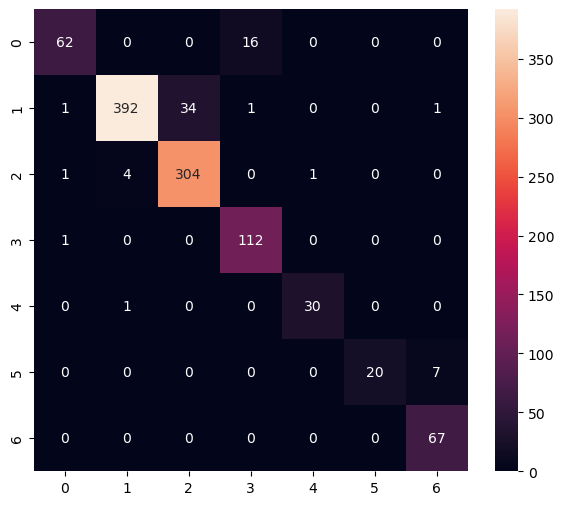

Classification Report
              precision    recall  f1-score   support

           0       0.95      0.79      0.87        78
           1       0.99      0.91      0.95       429
           2       0.90      0.98      0.94       310
           3       0.87      0.99      0.93       113
           4       0.97      0.97      0.97        31
           5       1.00      0.74      0.85        27
           6       0.89      1.00      0.94        67

    accuracy                           0.94      1055
   macro avg       0.94      0.91      0.92      1055
weighted avg       0.94      0.94      0.94      1055



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [16]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

In [17]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\asbot\AppData\Local\Temp\tmphvkpxof2\assets


6676

# 推論テスト

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

Wall time: 0 ns


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[3.4036572e-04 1.3567113e-02 2.0151354e-04 1.3332644e-05 3.6199795e-04
 1.8015718e-01 8.0535847e-01]
6
